## Oscilador armónico cuántico bajo el efecto de un campo eléctrico de magnitud constante
### Condiciones iniciales del sistema

Problema 4.17 extraído del capítulo 4 del libro Quatum Mechanics Concepts and Applications. Zetilli, N. (2009). Se considera una partícula de masa $m$ y una carga $q$ moviendose bajo la influencia del potencial de un oscilador armónico. Se asume que está bajo el efecto de un campo eléctrico constante $\varepsilon$. El hamiltoniano para este sistema corresponde a
\begin{equation}
    \hat{H} = \frac{1}{2} m \omega^2 \hat{X}^2 + \frac{\hat{P}^2}{2m} - q\varepsilon\hat{X}
\end{equation}
Se plantean las condiciones iniciales del sistema así como las librerias a utilizar. El método utilizado para solucionar es discretizar el espacio y se genera una matriz Hamiltoniana. El método de disparo y las aproximaciones planteadas por los libros son muy anticuadas y no son óptimas ya que tardan mucho en converger.

In [1]:
#Primero se introducen las librerias a utilizar para problema
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
m = 1.0
omega = 1.0
q = 1.0
epsilon = 0.1
h_bar = 1.0

# Parámetros de discretización
x_max = 10.0
num_points = 1000 #Entre más puntos más fina será la respuesta
x_values = np.linspace(-x_max, x_max, num_points)
dx = x_values[1] - x_values[0]

# Potencial
V = 0.5 * m * omega**2 * x_values**2 - q * epsilon * x_values

# Matriz Hamiltoniana
T = (-0.5 * h_bar**2 / m) * (np.diag(np.ones(num_points-1), -1) - 2*np.diag(np.ones(num_points), 0) + np.diag(np.ones(num_points-1), 1)) / dx**2
V_matrix = np.diag(V)
H = T + V_matrix

# Encontrar autovalores y autovectores
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Funciones de onda
psi = eigenvectors.T

# Normalizar las funciones de onda
psi /= np.sqrt(dx)  # Normalización apropiada para que la integral sea 1

# Calcular las densidades de probabilidad
probability_density = np.abs(psi)**2


### Densidades de probabilidad correspondientes a los estados del sistema

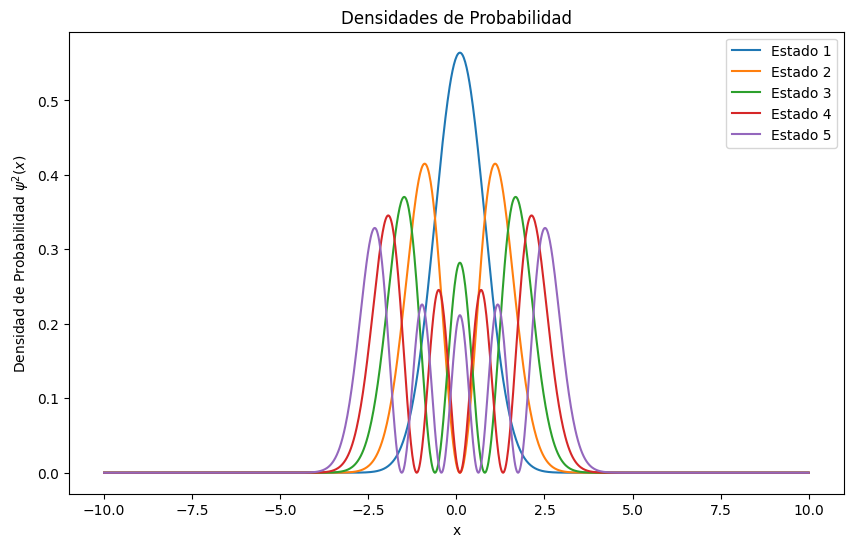

In [2]:
# Índices de los estados a visualizar
states_to_plot = list(range(0, 5))

plt.figure(figsize=(10, 6))
for i in states_to_plot:
    plt.plot(x_values, probability_density[i], label=f'Estado {i+1}')

plt.xlabel('x')
plt.ylabel('Densidad de Probabilidad $\psi^2 (x)$')
plt.legend()
plt.title('Densidades de Probabilidad')
plt.show()


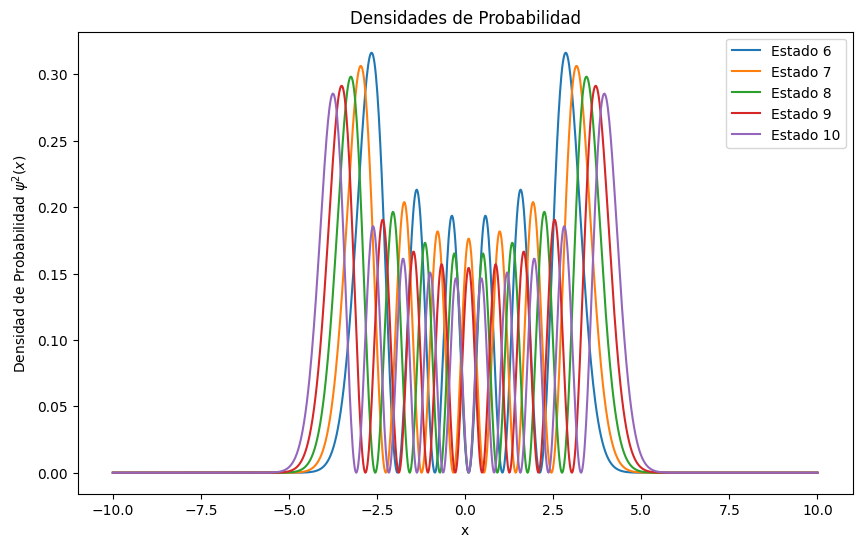

In [3]:
# Índices de los estados a visualizar
states_to_plot = list(range(5, 10))

plt.figure(figsize=(10, 6))
for i in states_to_plot:
    plt.plot(x_values, probability_density[i], label=f'Estado {i+1}')

plt.xlabel('x')
plt.ylabel('Densidad de Probabilidad $\psi^2 (x)$')
plt.legend()
plt.title('Densidades de Probabilidad')
plt.show()

### Visualización de las funciones de onda $\psi$ correspondientes a los diferentes estados

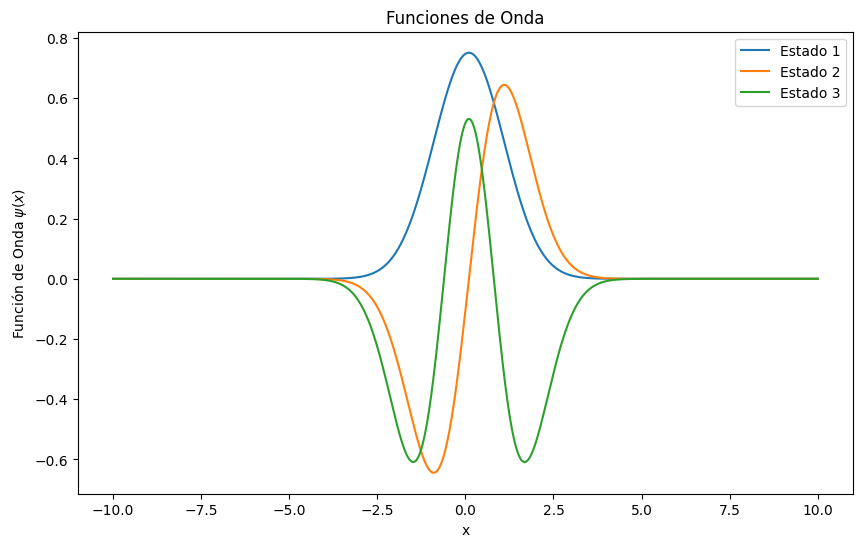

In [4]:
# Índices de los estados a visualizar
states_to_plot = [0, 1, 2]

plt.figure(figsize=(10, 6))
for i in states_to_plot:
    plt.plot(x_values, psi[i], label=f'Estado {i+1}')

plt.xlabel('x')
plt.ylabel('Función de Onda $\psi (x)$')
plt.legend()
plt.title('Funciones de Onda')
plt.show()

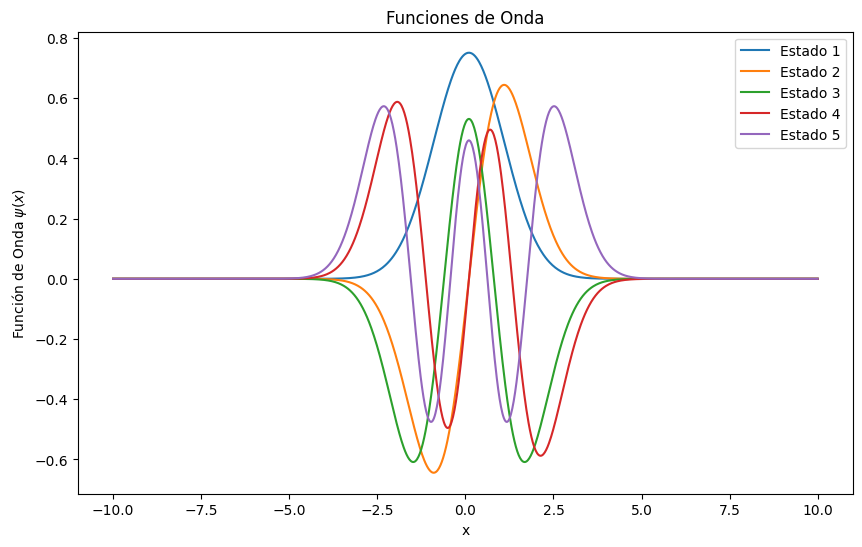

In [5]:
# Índices de los estados a visualizar
states_to_plot = list(range(0, 5))
plt.figure(figsize=(10, 6))
for i in states_to_plot:
    plt.plot(x_values, psi[i], label=f'Estado {i+1}')

plt.xlabel('x')
plt.ylabel('Función de Onda $\psi (x)$')
plt.legend()
plt.title('Funciones de Onda')
plt.show()

### Niveles de energía asociados a la solución del problema
A continuación se presentan los niveles de energía $E_n$ asociados a la solución del oscilador armónico cuántico bajo un campo eléctrico de magnitud constante.

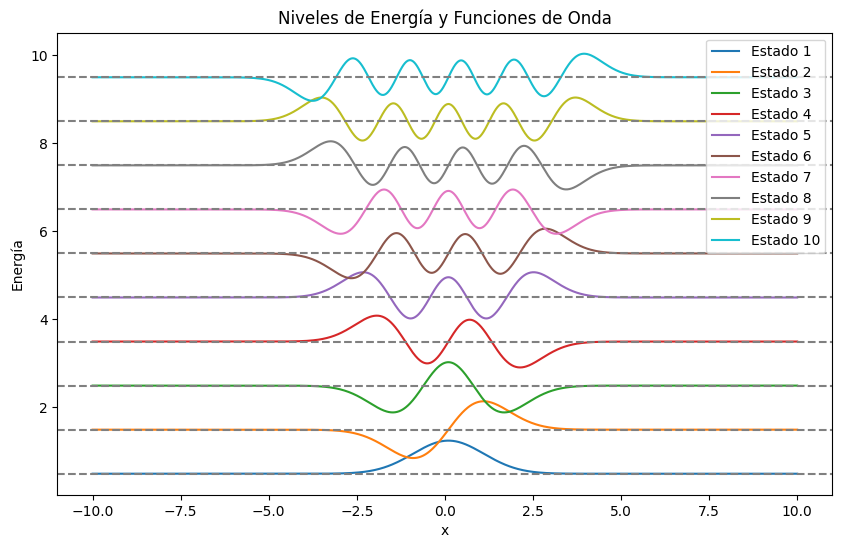

In [7]:
# Calcular los niveles de energía
energy_levels = eigenvalues[:10]  # Se puede ajustar el número de niveles a mostrar
states_to_plot = list(range(0, 10))

# Graficar las funciones de onda
plt.figure(figsize=(10, 6))
for i in range(len(states_to_plot)): #states to plot son las funciones de onda previamente definidas a graficar
    plt.plot(x_values, psi[states_to_plot[i]] + energy_levels[states_to_plot[i]], label=f'Estado {states_to_plot[i]+1}')

# Graficar líneas horizontales para los niveles de energía
for energy in energy_levels:
    plt.axhline(y=energy, color='gray', linestyle='--')

plt.xlabel('x')
plt.ylabel('Energía')
plt.title('Niveles de Energía y Funciones de Onda')
plt.legend()
plt.show()
